In [40]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [41]:
# Perfect sensor
def sense(x):
    return x

In [42]:
def simulate(Δt, x, dx):
    x += Δt * dx
    return x

In [43]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    
    if t <= 3.8:  # to 3,3
        pd = array([t, t])
    elif t <= 7.0:  # 3,-3
        pd = array([3.0, -3.0])
    elif t <= 10.0:  # -3,3
        pd = array([-3.0, 3.0])
    else:  # -3,-3
        pd = array([-3.0, -3.0])

    K = 1.0
    
    # Position Controller
    u = K * (pd - y)
    
    return u

In [44]:
tf = 25.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

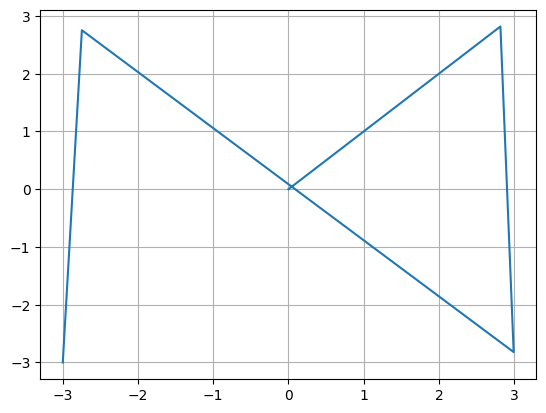

In [45]:
grid()
plot(x_log[:,0], x_log[:,1])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())